In [202]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


# read in all our data
BigMart_TrainData = pd.read_csv("E:\Self-Learning\TechnoColabs\MiniProject\Train_Cleaned.csv")
BigMart_TestData = pd.read_csv("E:\Self-Learning\TechnoColabs\MiniProject\Test_Cleaned.csv")

# set seed for reproducibility
np.random.seed(0)



In [203]:
BigMart_TrainData.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [204]:
BigMart_TrainData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [205]:
BigMart_TrainData.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [206]:
BigMart_TrainData['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [207]:
BigMart_TestData['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [208]:
BigMart_TrainData['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
BigMart_TestData['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [209]:
BigMart_TrainData['Item_Fat_Content']= BigMart_TrainData['Item_Fat_Content'].astype(str)

In [210]:
BigMart_TrainData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [212]:
BigMart_TrainData.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Univariate Analysis

c:\Users\yamen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

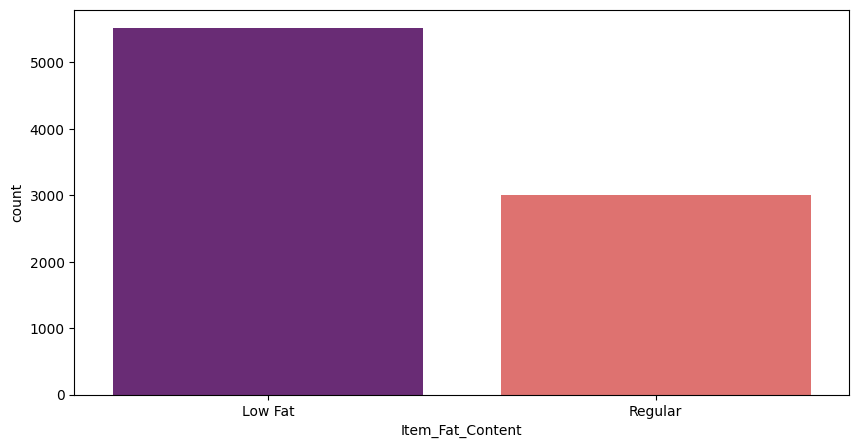

In [213]:
plt.figure(figsize=(10,5))
sns.countplot('Item_Fat_Content', data=BigMart_TrainData, palette= 'magma')

Low Fat Items are bought more often than Regular fat items.

c:\Users\yamen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Sales Distribution of Item Type'}, xlabel='Item_Type', ylabel='count'>

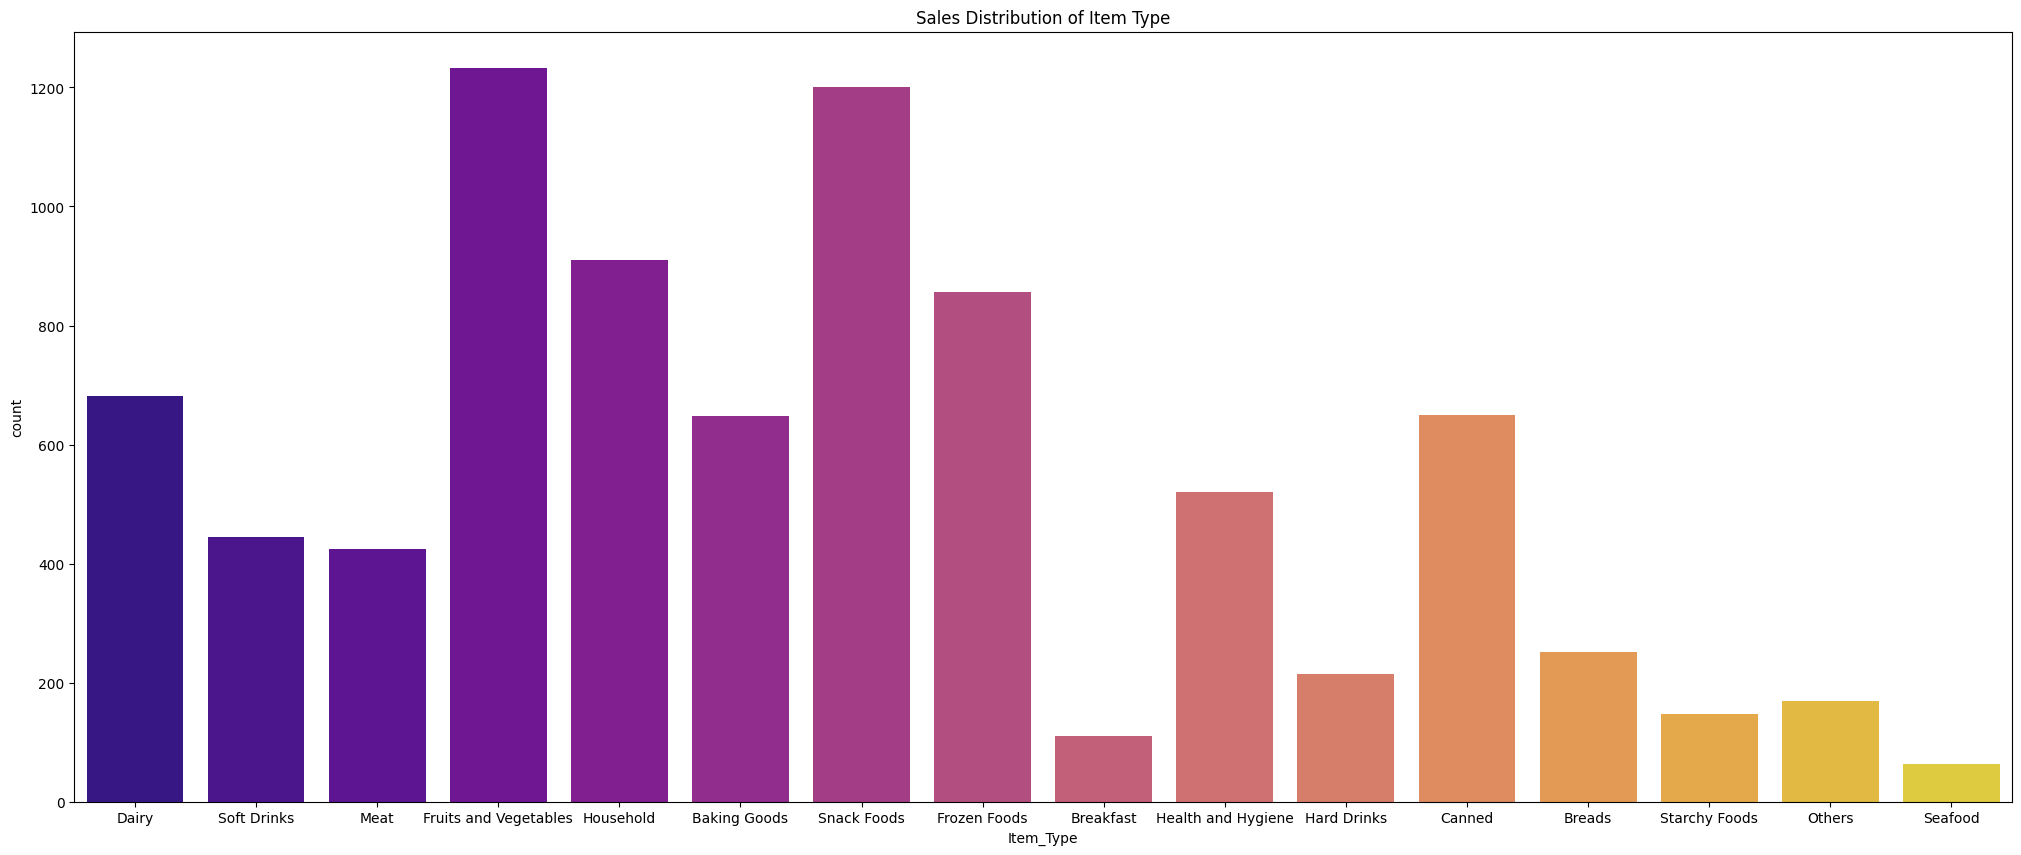

In [214]:
plt.figure(figsize=(25,10))
plt.title('Sales Distribution of Item Type')
sns.countplot('Item_Type',data=BigMart_TrainData,palette='plasma')

As expected the consumable items are the most sold.

c:\Users\yamen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Outlet Dize Distribution'}, xlabel='Outlet_Size', ylabel='count'>

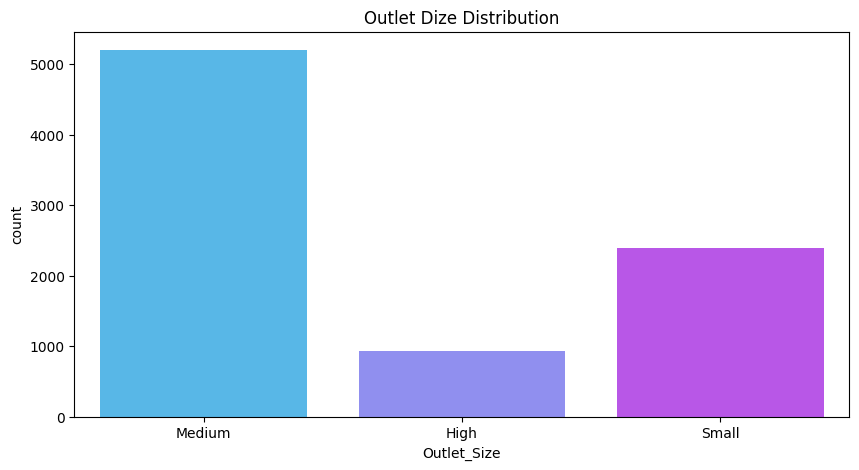

In [215]:
plt.figure(figsize=(10,5))
plt.title('Outlet Dize Distribution')
sns.countplot('Outlet_Size', data=BigMart_TrainData, palette='cool')

Medium Sized Shops are most common.

c:\Users\yamen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Location Type Distribution'}, xlabel='Outlet_Location_Type', ylabel='count'>

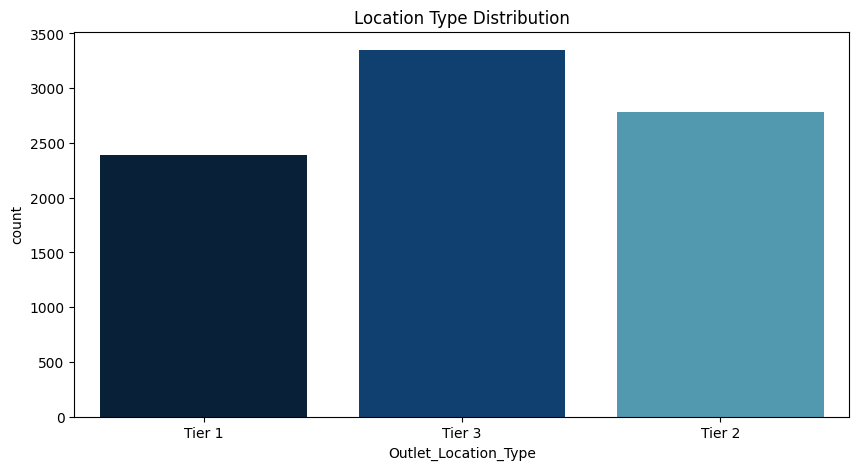

In [216]:
plt.figure(figsize=(10,5))
plt.title('Location Type Distribution')
sns.countplot('Outlet_Location_Type', data=BigMart_TrainData, palette='ocean')

The 3rd tier is the most common type of location.

c:\Users\yamen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Outlet Type Distribution'}, xlabel='Outlet_Type', ylabel='count'>

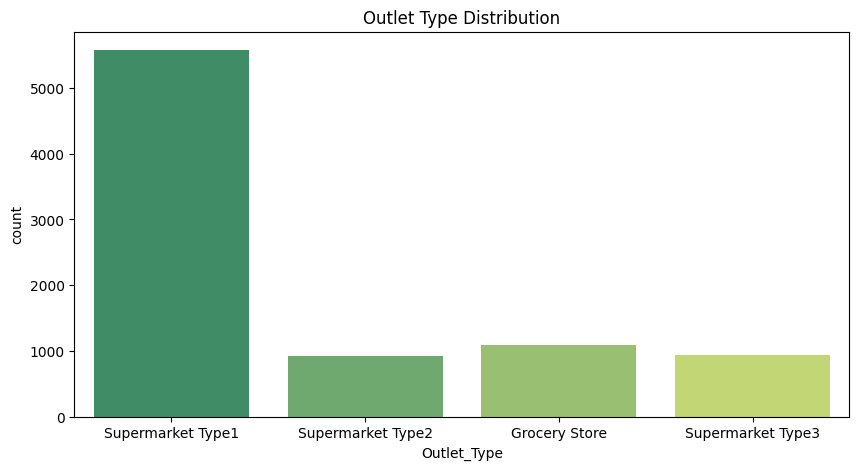

In [217]:
plt.figure(figsize=(10,5))
plt.title('Outlet Type Distribution')
sns.countplot('Outlet_Type', data=BigMart_TrainData, palette='summer')

The most common type of outlet is the first type.

c:\Users\yamen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Years of Establishment'}, xlabel='Outlet_Establishment_Year', ylabel='count'>

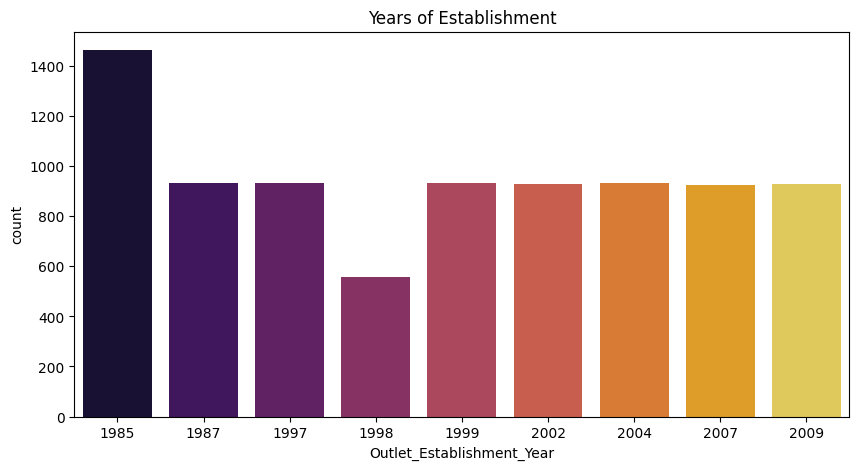

In [218]:
plt.figure(figsize=(10,5))
plt.title('Years of Establishment')
sns.countplot('Outlet_Establishment_Year', data=BigMart_TrainData, palette='inferno')

Most outlets were established in 1985.

## Bivariate Analysis

c:\Users\yamen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Item Fat to Sales Relation'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

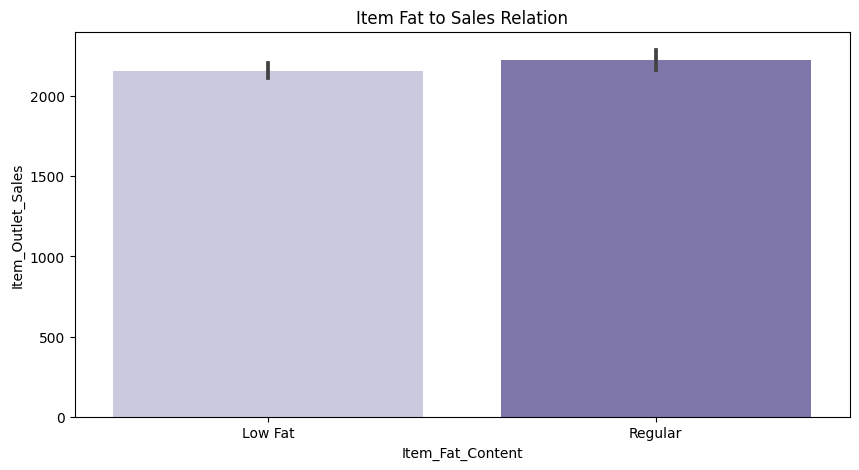

In [219]:
plt.figure(figsize=(10,5))
plt.title('Item Fat to Sales Relation')
sns.barplot('Item_Fat_Content','Item_Outlet_Sales', data=BigMart_TrainData, palette='Purples')

c:\Users\yamen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Item Visibility to Sales Relation'}, xlabel='Item Visibilitiy ', ylabel='Item Outlet Sales'>

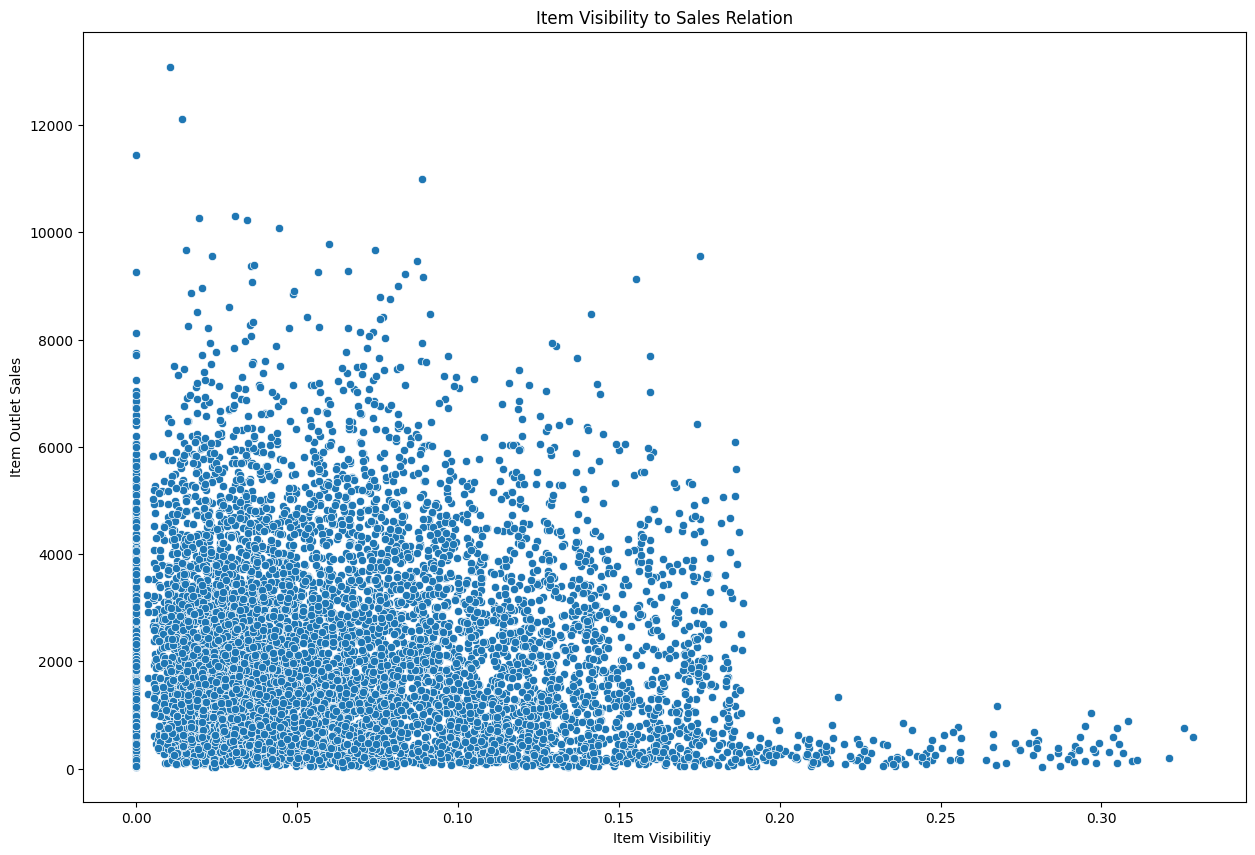

In [220]:
plt.figure(figsize=(15,10))
plt.title('Item Visibility to Sales Relation')
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item Visibilitiy ')
sns.scatterplot('Item_Visibility','Item_Outlet_Sales', data=BigMart_TrainData)

Items with 0 visibilty are making sales which makes no logical sense.

In [221]:
#Imputing the visibility data with the mean.
BigMart_TrainData['Item_Visibility']=BigMart_TrainData['Item_Visibility'].replace(0, BigMart_TrainData['Item_Visibility'].mean())
BigMart_TestData['Item_Visibility']=BigMart_TestData['Item_Visibility'].replace(0, BigMart_TestData['Item_Visibility'].mean())

c:\Users\yamen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Item Visibility to Sales Relation'}, xlabel='Item Visibilitiy ', ylabel='Item Outlet Sales'>

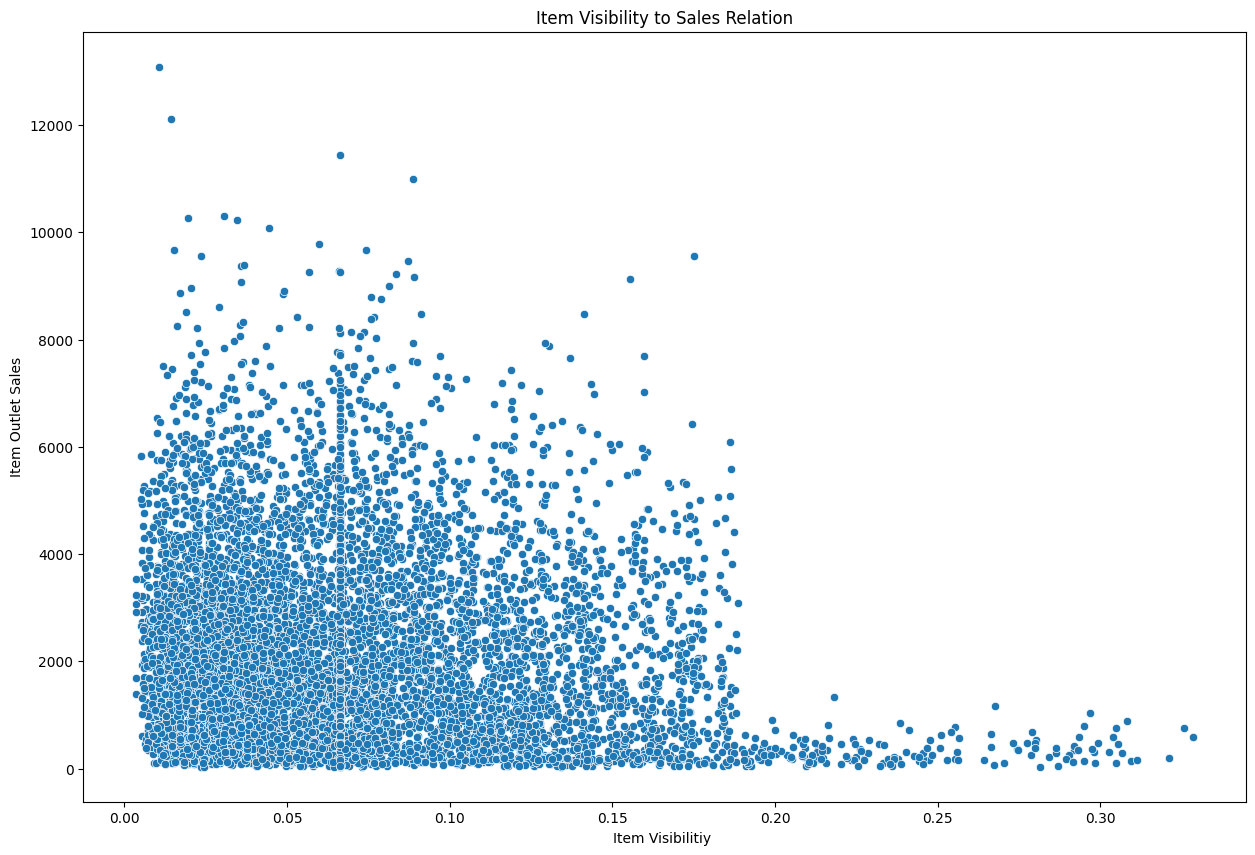

In [222]:
plt.figure(figsize=(15,10))
plt.title('Item Visibility to Sales Relation')
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item Visibilitiy ')
sns.scatterplot('Item_Visibility','Item_Outlet_Sales', data=BigMart_TrainData)

The visibilty now has increase a small amount over the zero which explains that these items are rarely sold.

<AxesSubplot:title={'center':'Item Type to Sales Relation'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

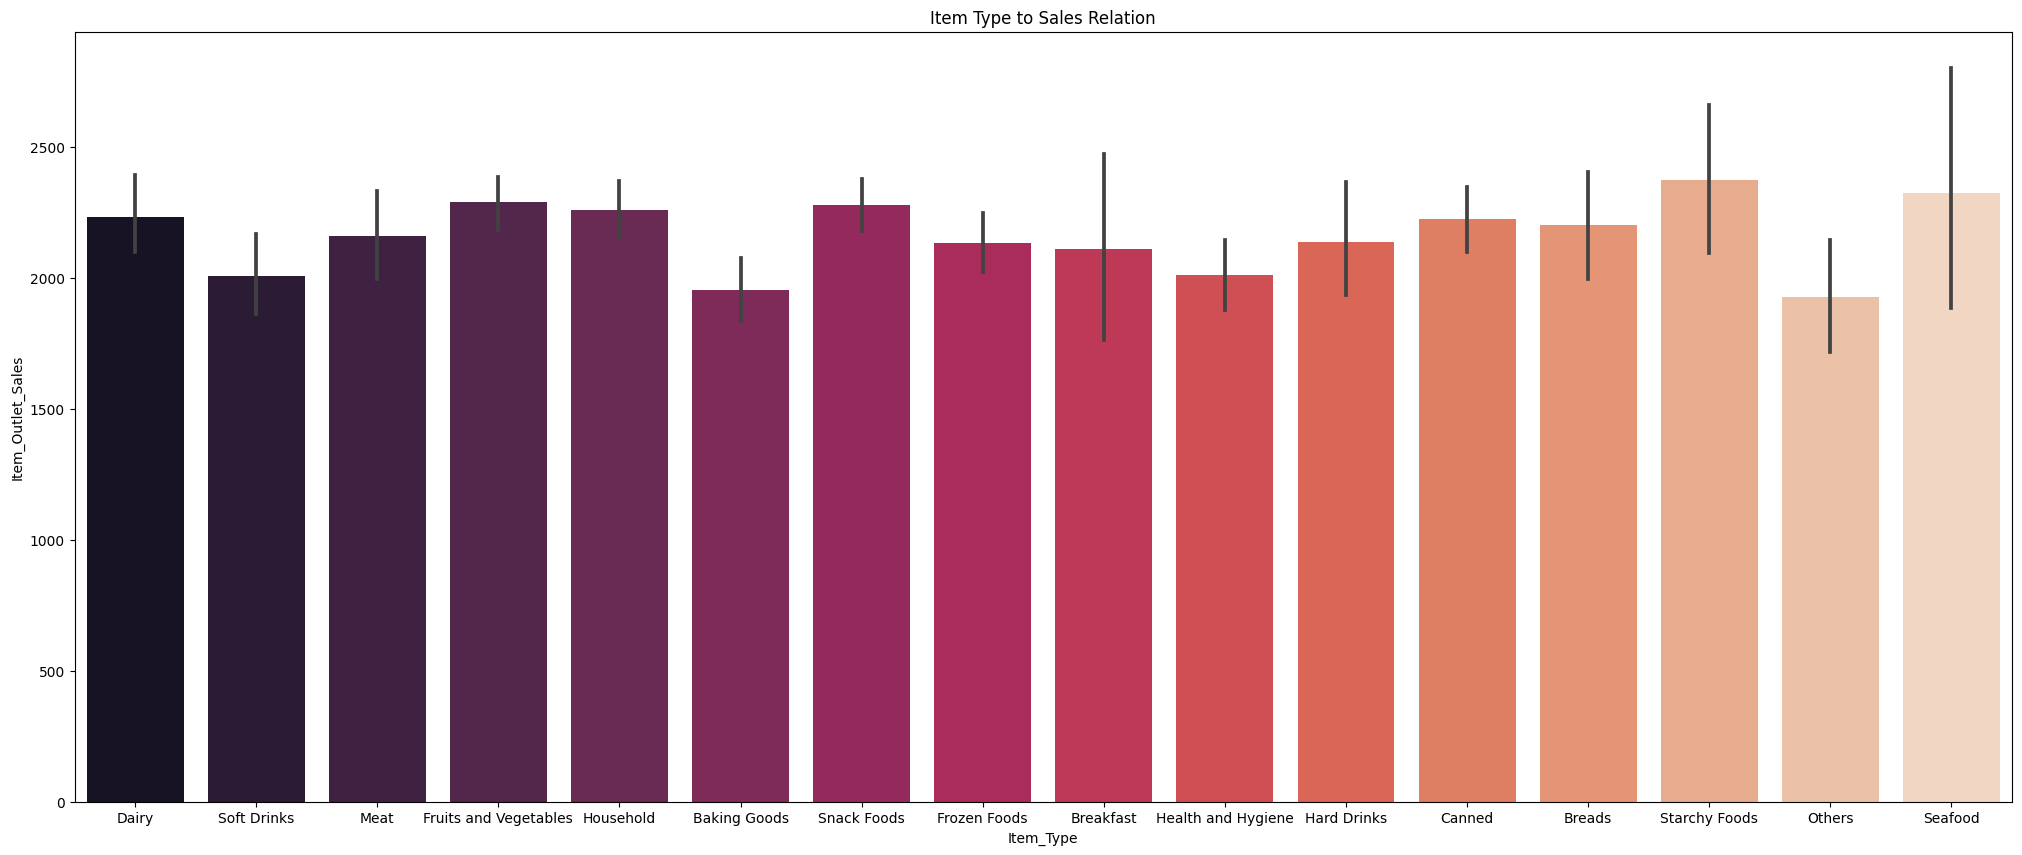

In [223]:
plt.figure(figsize=(25,10))
plt.title('Item Type to Sales Relation')
sns.barplot(y='Item_Outlet_Sales', x='Item_Type', data=BigMart_TrainData, palette='rocket')

The products available were Fruits and Vegetables and Snack Foods but the sales of Seafood and Starchy Foods are higher therfore the sales can be enhanced with having stock of the most bought products.

Text(0, 0.5, 'Item Outlet Sales')

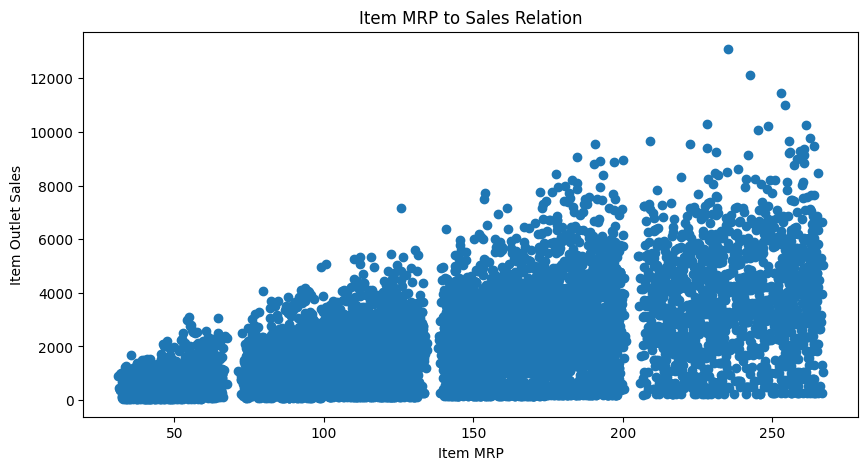

In [224]:
plt.figure(figsize=(10,5))
plt.title('Item MRP to Sales Relation')
plt.scatter(y='Item_Outlet_Sales', x='Item_MRP',data=BigMart_TrainData)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

Items sold at above 200 Dollars are the most sold.

<AxesSubplot:title={'center':'Outlet Size to Sales Relation'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

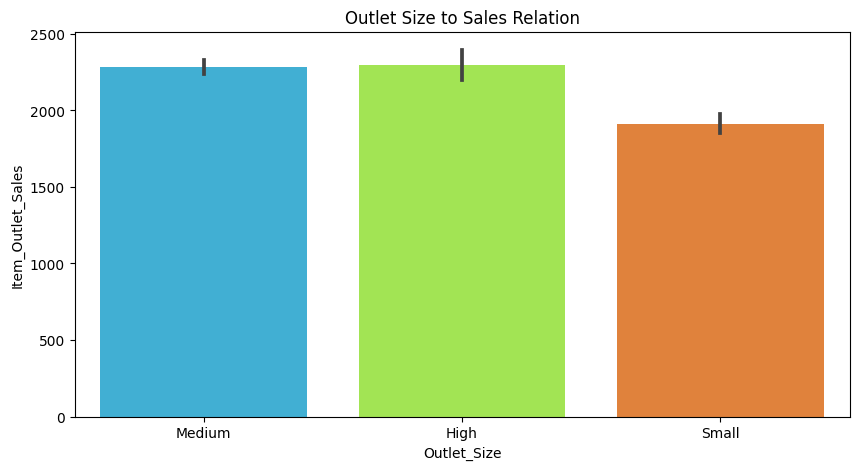

In [225]:
plt.figure(figsize=(10,5))
plt.title('Outlet Size to Sales Relation')
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales', data=BigMart_TrainData, palette='turbo')

Sales are highest in medium and high outlet sizes but the high size may have more potential to increase sales.

<AxesSubplot:title={'center':'Outlet Location Type to Sales Relation'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

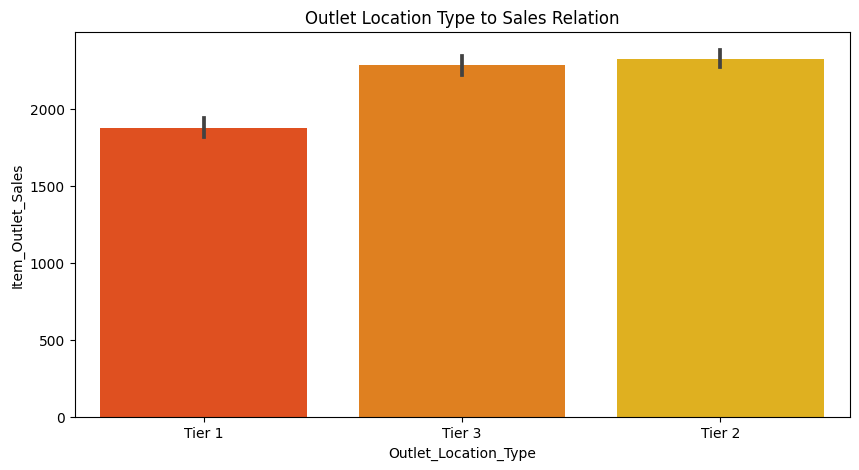

In [226]:
plt.figure(figsize=(10,5))
plt.title('Outlet Location Type to Sales Relation')
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=BigMart_TrainData, palette='autumn')

Sales are weaker in tier 1 than 2 and 3.

<AxesSubplot:title={'center':'Outlet Establishment Year to Sales Relation'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

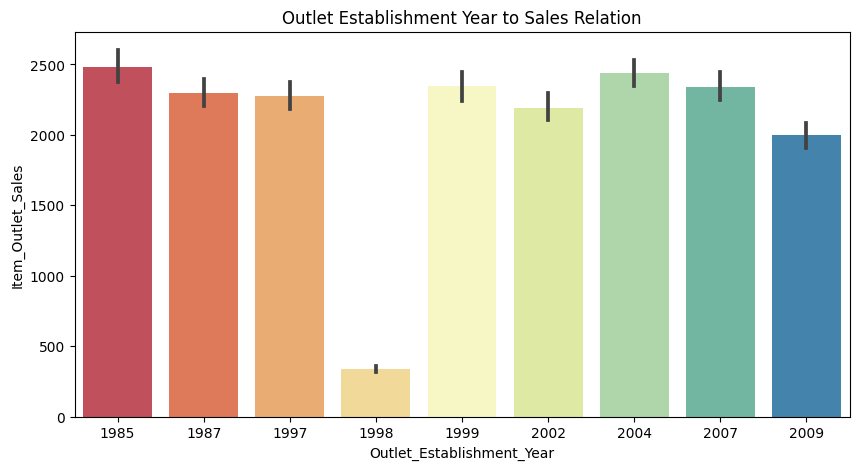

In [227]:
plt.figure(figsize=(10,5))
plt.title('Outlet Establishment Year to Sales Relation')
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales', data=BigMart_TrainData, palette='Spectral')

Outlets established in 1985, 87 and 97 clearly have an advantage over the later outlets, and in shop established in the year 1998 has the worst sales of all 10 shops.

## Feature Engineering

In [228]:
BigMart_TrainData

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [229]:
labelencoder = LabelEncoder()

BigMart_TrainData_Encoded = BigMart_TrainData.copy(deep=True)

BigMart_TrainData_Encoded['Item_Identifier'] = labelencoder.fit_transform(BigMart_TrainData_Encoded['Item_Identifier'])
BigMart_TrainData_Encoded ['Item_Fat_Content'] = labelencoder.fit_transform(BigMart_TrainData_Encoded["Item_Fat_Content"])
BigMart_TrainData_Encoded ['Item_Type'] = labelencoder.fit_transform(BigMart_TrainData_Encoded["Item_Type"])
BigMart_TrainData_Encoded['Outlet_Identifier'] = labelencoder.fit_transform(BigMart_TrainData_Encoded['Outlet_Identifier'])
BigMart_TrainData_Encoded ['Outlet_Size'] = labelencoder.fit_transform(BigMart_TrainData_Encoded["Outlet_Size"])
BigMart_TrainData_Encoded ['Outlet_Location_Type'] = labelencoder.fit_transform(BigMart_TrainData_Encoded["Outlet_Location_Type"])
BigMart_TrainData_Encoded ['Outlet_Type'] = labelencoder.fit_transform(BigMart_TrainData_Encoded["Outlet_Type"])
BigMart_TrainData ['Item_Identifier'] = BigMart_TrainData['Item_Identifier'].astype('category')
BigMart_TrainData_Encoded

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [230]:
BigMart_TrainData.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content               object
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
dtype: object

In [231]:
BigMart_TrainData_Encoded.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.070213,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.048742,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.033085,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.062517,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [232]:
BigMart_Features = BigMart_TrainData_Encoded.drop(columns='Item_Outlet_Sales', axis=1)
BigMart_Target = BigMart_TrainData_Encoded['Item_Outlet_Sales']

In [233]:
BigMart_Features

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.066132,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.066132,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [234]:
BigMart_Target

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [235]:
Features_train, Features_test, Target_train, Target_test = train_test_split(BigMart_Features, BigMart_Target, test_size=0.2, random_state=2)

In [236]:
print(BigMart_Features.shape, Features_train.shape, Features_test.shape)

(8523, 11) (6818, 11) (1705, 11)


## Training The ML Model

In [237]:
regressor = XGBRegressor()

In [238]:
regressor.fit(Features_train, Target_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [239]:
# prediction on training data
training_data_prediction = regressor.predict(Features_train)

In [240]:
# R squared Value
r2_train = metrics.r2_score(Target_train, training_data_prediction)

In [241]:
print('R Squared value = ', r2_train)

R Squared value =  0.8592398455884529


In [242]:
# prediction on test data
test_data_prediction = regressor.predict(Features_test)

In [243]:
r2_test = metrics.r2_score(Target_test, test_data_prediction)

In [244]:
print('R Squared value = ', r2_test)

R Squared value =  0.5195450148676334


# Thank You!